In [ ]:
# To-do's: remove unnecessary words
# redo for mentions rather than user
# export analysis df to csv
# visualize in tableau

In [1]:
# Library Imports
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import config

plt.style.use('fivethirtyeight')

In [3]:
# Set variables for API keys and tokens
ak = config.apiKey
ask = config.apiSecretKey
at = config.accessToken
ats = config.accessTokenSecret

# Create authentication object
authenticate = tweepy.OAuthHandler(ak, ask)

# Set access token and access token secret
authenticate.set_access_token(at, ats)

# Create API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [7]:
# Extract 100 tweets from user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode = "extended")

# Print last 5 tweets from user
print("5 most recent tweets: \n")

i = 1

for tweet in posts[:5]:

    print(str(i) + '. ' + tweet.full_text + '\n')
    
    i += 1

5 most recent tweets: 

1. RT @melindagates: Decision-makers can take steps right now to make sure the world recovers from this pandemic stronger, more prepared &amp; mor…

2. Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year. @BernardOlayo founded @Hewa_Tele to address this often-overlooked challenge. https://t.co/TSea0oyDjP

3. This hero is playing a critical role in Kenya’s preparations to tackle COVID-19 by scaling up medical oxygen supplies that will be needed to keep the most critically ill patients alive. https://t.co/U2YcRgzSDA

4. RT @MichelleObama: Here's what #Juneteenth means to me: https://t.co/KlOoYwdzD5

5. RT @NavigatingNikki: “It’s that clarity of language about the VALUE of black life in America that distinguishes #Juneteenth as emancipation…



In [8]:
# Create dataframe containing tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

df.head()

,Tweets
0,RT @melindagates: Decision-makers can take ste...
1,"Globally, a lack of medical oxygen–needed to t..."
2,This hero is playing a critical role in Kenya’...
3,RT @MichelleObama: Here's what #Juneteenth mea...
4,RT @NavigatingNikki: “It’s that clarity of lan...


In [16]:
# Clean tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove '#' symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'https?:\/\/\S+','',text) # Remove hyperlink
    text = re.sub(r':','',text) # Remove colons
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df.head()

,Tweets,Subjectivity,Polarity
0,Decision-makers can take steps right now to m...,0.641534,0.428571
1,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667
2,This hero is playing a critical role in Kenya’...,0.540000,0.020000
3,Here's what Juneteenth means to me,0.000000,0.000000
4,“It’s that clarity of language about the VALU...,0.433333,-0.166667


In [17]:
# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Decision-makers can take steps right now to m...,0.641534,0.428571
1,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667
2,This hero is playing a critical role in Kenya’...,0.540000,0.020000
3,Here's what Juneteenth means to me,0.000000,0.000000
4,“It’s that clarity of language about the VALU...,0.433333,-0.166667
...,...,...,...
95,These global health heroes have helped Banglad...,0.187500,-0.062500
96,It’s encouraging to see these results. Typhoid...,0.733333,-0.100000
97,Thanks to the work of this father–daughter dyn...,0.247917,0.175000
98,Solving the world’s toughest challenges—like f...,0.809091,0.206061


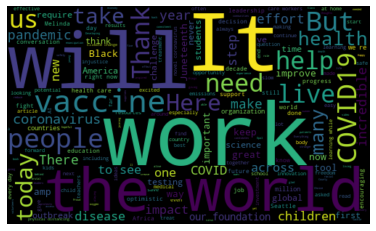

In [20]:
# Plot Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [21]:
# Compute negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Decision-makers can take steps right now to m...,0.641534,0.428571,Positive
1,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667,Negative
2,This hero is playing a critical role in Kenya’...,0.540000,0.020000,Positive
3,Here's what Juneteenth means to me,0.000000,0.000000,Neutral
4,“It’s that clarity of language about the VALU...,0.433333,-0.166667,Negative
...,...,...,...,...
95,These global health heroes have helped Banglad...,0.187500,-0.062500,Negative
96,It’s encouraging to see these results. Typhoid...,0.733333,-0.100000,Negative
97,Thanks to the work of this father–daughter dyn...,0.247917,0.175000,Positive
98,Solving the world’s toughest challenges—like f...,0.809091,0.206061,Positive


In [25]:
# Print positive tweets

j = 1

sortedDF = df.sort_values(by=['Polarity'], ascending=False)

for i in range(0, sortedDF.shape[0]):
    
    if (sortedDF['Analysis'][i] == 'Negative'):
    
        print(str(j) + '. ' + sortedDF['Tweets'][i] + '\n')
    
        j+=1

1. Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

2.  “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

3.  “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

4.  Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

5. _Nyongo 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

6. …in policing, criminal justice, education, health care, housing, the workplace and all other areas of their lives.

7. The horrifying killings of George Floyd, Ahmaud Arbery, Breonna Taylor and far too many other Black people—and the protests they sparked—are shini

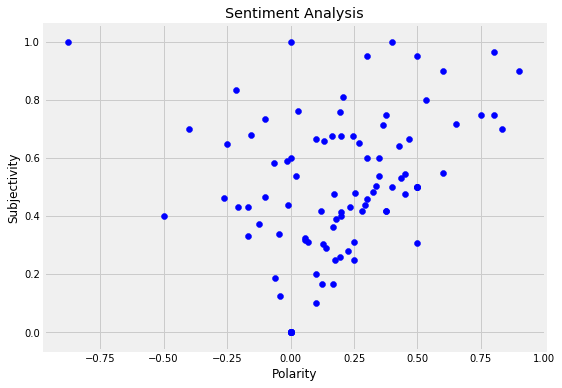

In [27]:
# Plot polarity and subjectivity

plt.figure(figsize = (8,6))

for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [32]:
# Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]*100), 1)

68.0

In [33]:
# Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]*100), 1)

19.0

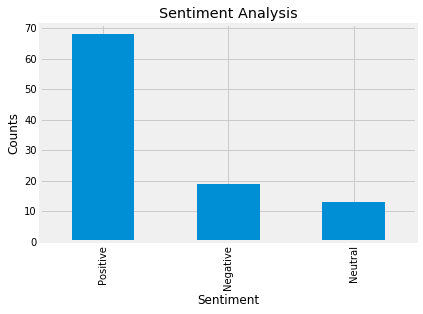

In [36]:
# Show value counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show()